In [84]:
from sklearn import tree
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn import tree
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve


In [85]:
def get_datasets(std_size=False):
    # My python only likes absolute paths 
    brca = pd.read_csv('C:\\Users\\sohai\\PycharmProjects\\comp3212-cancer-exploration\\data\\Gistic2_CopyNumber_BRCA', sep='\t')
    ovca = pd.read_csv('C:\\Users\sohai\\PycharmProjects\\comp3212-cancer-exploration\\data\\Gistic2_CopyNumber_OVCA', sep='\t')
    brca.set_index('Gene Symbol', inplace=True)
    ovca.set_index('Gene Symbol', inplace=True)
    brca = brca.transpose()
    ovca = ovca.transpose()
    brca['BRCA'] = 1
    ovca['BRCA'] = 0
    print('size brca, ovca', len(brca), len(ovca))
    if not std_size:
        print('normal size', len(brca)+len(ovca))
        df = pd.concat([brca, ovca[1:]])
    elif std_size:
        print('sampled size', len(ovca)+len(ovca))
        df = pd.concat([brca[0:len(ovca)], ovca[1:]])
    print(len(df), len(brca.transpose()-2) + len(ovca.transpose()-2))
    return df
df = get_datasets()
df.head()

size brca, ovca 1080 579
normal size 1659
1658 49554


,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7,BRCA
TCGA-3C-AAAU-01,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,...,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,1
TCGA-3C-AALI-01,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,...,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,1
TCGA-3C-AALJ-01,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,...,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,1
TCGA-3C-AALK-01,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,...,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,1
TCGA-4H-AAAK-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,1


In [86]:
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [87]:
y = df["BRCA"]
X = df[df.columns[:-1]]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [79]:
# Hyper parameter tuning 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


param_dist = {"max_depth": [3,None],
             "min_samples_leaf": randint(1,9),
             "criterion": ["gini","entropy"],
             }

t = tree.DecisionTreeClassifier()
# Cross validation is at 5 now
tree_cv = RandomizedSearchCV(t,param_dist,cv=5)
tree_cv.fit(X_train,y_train)

print("Tuned Decision tree params: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision tree params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3}
Best score is 0.8864864864864865


0.8868613138686131


[Text(167.4, 190.26, 'X[20721] <= -0.316\nentropy = 0.934\nsamples = 1110\nvalue = [388, 722]'),
 Text(83.7, 135.9, 'X[19345] <= -0.486\nentropy = 0.847\nsamples = 420\nvalue = [305, 115]'),
 Text(41.85, 81.53999999999999, 'X[4628] <= -0.576\nentropy = 0.352\nsamples = 226\nvalue = [211, 15]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.811\nsamples = 44\nvalue = [33, 11]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.152\nsamples = 182\nvalue = [178, 4]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5212] <= 0.68\nentropy = 0.999\nsamples = 194\nvalue = [94, 100]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.851\nsamples = 123\nvalue = [34, 89]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.622\nsamples = 71\nvalue = [60, 11]'),
 Text(251.10000000000002, 135.9, 'X[5216] <= 0.866\nentropy = 0.53\nsamples = 690\nvalue = [83, 607]'),
 Text(209.25, 81.53999999999999, 'X[22083] <= -0.424\nentropy = 0.316\nsamples = 613\nvalue = [35, 578]'),
 Text(188.3250000

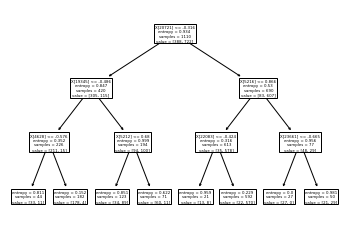

In [91]:
# Making the decision tree no PCA
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 2)
X_train = pd.DataFrame(X_train, columns=df.columns[ :len(df.columns)-1])

clf = clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
tree.plot_tree(clf)

In [92]:
# Important features 
features1 = list(X_train.columns)
fi_model = pd.DataFrame({'feature': features1,
                   'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
20721,PIAS4,0.508385
5216,TERC,0.159307
19345,RHBDL3,0.132758
5212,EGFEM1P,0.072801
22083,U2AF2,0.061061
23661,CRELD2,0.039577
4628,PXK,0.026111
0,ACAP3,0.000000
16523,LRRC9,0.000000
16522,MIR5586,0.000000


at 0.9999 % of the variance ======
original shape:    (1658, 24776)
transformed shape: (1658, 997)
0.9518072289156626


[Text(167.4, 190.26, 'X[0] <= 7.162\nentropy = 0.938\nsamples = 1243\nvalue = [441, 802]'),
 Text(83.7, 135.9, 'X[0] <= -5.834\nentropy = 0.3\nsamples = 808\nvalue = [43, 765]'),
 Text(41.85, 81.53999999999999, 'X[21] <= -6.895\nentropy = 0.106\nsamples = 576\nvalue = [8, 568]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.485\nsamples = 57\nvalue = [6, 51]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.036\nsamples = 519\nvalue = [2, 517]'),
 Text(125.55000000000001, 81.53999999999999, 'X[7] <= 5.209\nentropy = 0.612\nsamples = 232\nvalue = [35, 197]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.351\nsamples = 197\nvalue = [13, 184]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.952\nsamples = 35\nvalue = [22, 13]'),
 Text(251.10000000000002, 135.9, 'X[7] <= -10.106\nentropy = 0.42\nsamples = 435\nvalue = [398, 37]'),
 Text(209.25, 81.53999999999999, 'X[4] <= -0.915\nentropy = 0.954\nsamples = 72\nvalue = [45, 27]'),
 Text(188.32500000000002, 27.180000000000

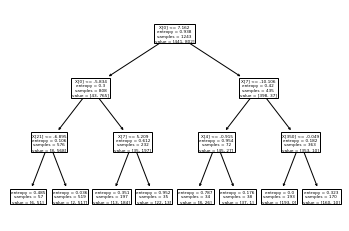

In [89]:
# PCA and train now
x = 0.9999
pca = PCA(n_components=0.99)
pca.fit(X_train)
X_pca = pca.transform(X)
pca = PCA(n_components=x)
pca.fit(X_train)
X_pca = pca.transform(X)
print('at', x, '% of the variance ======')
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
y_red = pd.Series(y)

df_redd = pd.DataFrame(X_pca)
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 2)
X_traind, X_testd, y_traind, y_testd = train_test_split(df_redd, y)

clf.fit(X_traind,y_traind)
print(clf.score(X_testd,y_testd))
tree.plot_tree(clf)

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

# Making the new split given the PCA
X_train, X_test, y_train, y_test = train_test_split(df_redd, y)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [11]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [12]:
train_rf_predictions = clf.predict(X_train)
train_rf_probs = clf.predict_proba(X_train)[:, 1]

rf_predictions = clf.predict(X_test)
rf_probs = clf.predict_proba(X_test)[:, 1]

Recall Baseline: 1.0 Test: 0.98 Train: 0.98
Precision Baseline: 0.6 Test: 0.94 Train: 0.96
Roc Baseline: 0.5 Test: 0.97 Train: 0.98


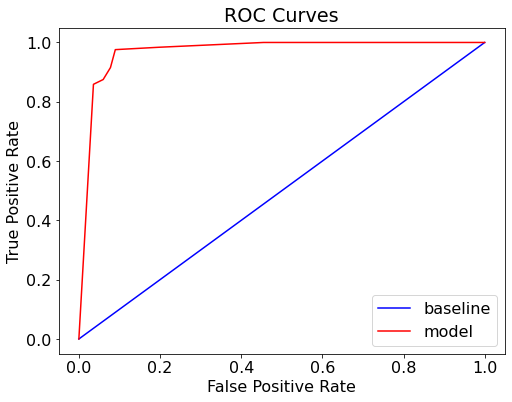

In [13]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)


Confusion matrix, without normalization
[[152  15]
 [  6 242]]


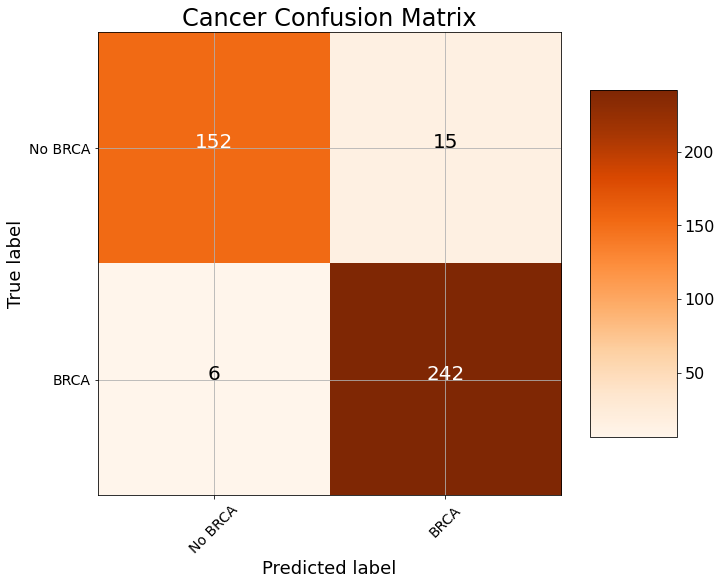

In [14]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['No BRCA', 'BRCA'],
                      title = 'Cancer Confusion Matrix')

In [15]:
features = list(X_traind.columns)
fi_model = pd.DataFrame({'feature': X_traind.columns,
                   'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
0,0,0.840804
7,7,0.084966
21,21,0.032040
4,4,0.027807
881,881,0.014383
663,663,0.000000
667,667,0.000000
666,666,0.000000
665,665,0.000000
664,664,0.000000


In [16]:
X

,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA-3C-AAAU-01,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,...,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395
TCGA-3C-AALI-01,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,...,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504
TCGA-3C-AALJ-01,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,...,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063
TCGA-3C-AALK-01,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,...,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008
TCGA-4H-AAAK-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-72-4241-01,0.339,0.339,0.339,0.339,0.339,0.339,0.339,0.339,0.339,0.339,...,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100
TCGA-OY-A56P-01,0.813,0.813,0.813,0.813,0.813,0.813,0.813,0.813,0.813,0.813,...,-0.080,-0.080,-0.080,-0.080,-0.080,-0.080,-0.080,-0.080,-0.080,-0.080
TCGA-OY-A56Q-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.195,-0.195,-0.195,-0.195,-0.195,-0.195,-0.195,-0.195,-0.195,-0.195
TCGA-VG-A8LO-01,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,0.137,...,-0.675,-0.675,-0.675,-0.675,-0.675,-0.675,-0.675,-0.675,-0.675,-0.675


In [81]:

# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
print((np.abs(pca.components_[1]).argsort()[::-1])[:5])
print(np.abs(pca.components_[1]).argmax())

most_important = [np.abs(((np.abs(pca.components_[i]).argsort()[:5:-1])[:5])) for i in range(n_pcs)]

initial_feature_names = features1

most_important_names2 = []
for x in most_important:
    temp = []
    for y in x:
        temp.append(initial_feature_names[y])
    most_important_names2.append(temp)
        
dic = {'PC{}'.format(i): most_important_names2[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items())
#print(most_important_names2)

df.head(30)

[10655 10657 10654 10658 10656]
10655


,0,1
0,PC0,"[IKZF3, GRB7, ERBB2, PGAP3, STARD3]"
1,PC1,"[CASC8, MYC, CCAT1, PVT1, POU5F1B]"
2,PC2,"[TRAPPC9, LINC00964, MROH1, FAM203A, MTSS1]"
3,PC3,"[CHRM3, ZNF695, ZNF670, ACTN2, SNORA25|ENSG000..."
4,PC4,"[PCK1, DOK5, CTCFL, ZBP1, PMEPA1]"
5,PC5,"[USP32, CA4, SCARNA20|ENSG00000252577.1, TUBD1..."
6,PC6,"[VMP1, USP32, PTRH2, TUBD1, MIR21]"
7,PC7,"[RPS9, ZNF808, ZNF83, LENG1, CNOT3]"
8,PC8,"[CLTC, PTRH2, TUBD1, RGS9, MIR548D2]"
9,PC9,"[TBXAS1, MRPS33, MGAM, CNTNAP2, JHDM1D]"


In [82]:
df.head(50)

,0,1
0,PC0,"[IKZF3, GRB7, ERBB2, PGAP3, STARD3]"
1,PC1,"[CASC8, MYC, CCAT1, PVT1, POU5F1B]"
2,PC2,"[TRAPPC9, LINC00964, MROH1, FAM203A, MTSS1]"
3,PC3,"[CHRM3, ZNF695, ZNF670, ACTN2, SNORA25|ENSG000..."
4,PC4,"[PCK1, DOK5, CTCFL, ZBP1, PMEPA1]"
5,PC5,"[USP32, CA4, SCARNA20|ENSG00000252577.1, TUBD1..."
6,PC6,"[VMP1, USP32, PTRH2, TUBD1, MIR21]"
7,PC7,"[RPS9, ZNF808, ZNF83, LENG1, CNOT3]"
8,PC8,"[CLTC, PTRH2, TUBD1, RGS9, MIR548D2]"
9,PC9,"[TBXAS1, MRPS33, MGAM, CNTNAP2, JHDM1D]"


In [52]:
df.head(10)

,0,1
0,PC0,IKZF3
1,PC1,CASC8
2,PC2,TRAPPC9
3,PC3,CHRM3
4,PC4,PCK1
5,PC5,USP32
6,PC6,VMP1
7,PC7,RPS9
8,PC8,CLTC
9,PC9,TBXAS1


In [ ]:
"""
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
"""